# STOOQ DE
___

## Introduction and Dataset Overview

In this data project I will focus on exploratory data analysis of stock prices. The data used in the project comes from [Stooq](https://stooq.pl/), stock exchange portal.

The goal of the following project is to create interesting visualizations and find patterns in stock prices. There are just German companies considered. The stock prices in our dataset encompass years 1993-2020.

To start the whole analyse process we will first of all import all the necessary libraries as well as open the csv file contining our dataset. What is more, we will explore the dataset to get more familiar with it. We can print the first row formatted as a table using DataFrame.iloc[]. Other usufull techniques will include DataFrame.head(), DataFrame.tail(), DataFrame.dropna().

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Reading in the data for our analysis
stooq_de = pd.read_csv('finance_projects\\stooq_de.csv', encoding='ISO-8859-1', low_memory=False)

# Getting familiar with our dataset
print(stooq_de.iloc[0])
print(stooq_de.head())
print(stooq_de.tail())

<TICKER>                  SNG.DE
<PER>                          D
<DATE>       2000-05-02 00:00:00
<TIME>                         0
<OPEN>                   20697.6
<HIGH>                     22064
<LOW>                    20091.2
<CLOSE>                    22064
<VOL>                        625
<OPENINT>                      0
Name: 0, dtype: object
  <TICKER> <PER>               <DATE>  <TIME>   <OPEN>   <HIGH>    <LOW>  \
0   SNG.DE     D  2000-05-02 00:00:00       0  20697.6  22064.0  20091.2   
1   SNG.DE     D  2000-05-03 00:00:00       0  20713.6  20852.8  19640.0   
2   SNG.DE     D  2000-05-05 00:00:00       0  20560.0  21771.2  20254.4   
3   SNG.DE     D  2000-05-04 00:00:00       0  20254.4  20849.6  19809.6   
4   SNG.DE     D  2000-05-16 00:00:00       0  19793.6  19947.2  19516.8   

   <CLOSE>  <VOL>  <OPENINT>  
0  22064.0    625          0  
1  20592.0    365          0  
2  20254.4    549          0  
3  20100.8    301          0  
4  19716.8     83          0  
    

## Further Exploration and Modifications

There are 10 columns in our dataset. First column (TICKER) indicates the company name, PER - D (day), volume (VOL), openint column etc.. We will modify the names of the columns to make them more readable using [camel case](https://medium.com/better-programming/string-case-styles-camel-pascal-snake-and-kebab-case-981407998841) style. We will remove `openint` column as we won't use it.

In [2]:
# Renaming columns
to_rename = {'<TICKER>': 'companyTicker', '<PER>': 'per', '<DATE>': 'date', '<TIME>': 'time', '<OPEN>': 'openPrice', '<HIGH>': 'high', '<LOW>': 'low', '<CLOSE>': 'closePrice', '<VOL>': 'volume'}
stooq_de = stooq_de.rename(to_rename, axis=1)

# Dropping column
stooq_de.drop('<OPENINT>', axis='columns', inplace=True)

# Exploring the updated columns
stooq_de.columns

Index(['companyTicker', 'per', 'date', 'time', 'openPrice', 'high', 'low',
       'closePrice', 'volume'],
      dtype='object')

Let's investigate what companies we have in our dataset and how often data related to that company appears in our dataset.

In [3]:
# Finding companies
stooq_de['companyTicker'].value_counts()

SNG.DE     3806
KSB3.DE    2889
NSU.DE     2870
RAA.DE     2304
CBK.DE     2221
KSB.DE     2103
ALV.DE     2035
MUV2.DE    1834
VOW.DE     1652
VOW3.DE    1249
LIN.DE     1056
ADS.DE     1004
HYQ.DE      642
MTX.DE      610
ZO1.DE      482
SRT3.DE     447
SRT.DE      354
PFV.DE      340
WDI.DE      242
HNR1.DE     229
NWO.DE      212
NC5A.DE     209
WCH.DE      174
M5Z.DE      165
MDG1.DE     164
DB1.DE      142
YSN.DE      133
ADV.DE      125
BC8.DE       94
HOT.DE       68
KU2.DE       47
AAD.DE       43
HLAG.DE      14
SZG.DE       12
SAP.DE       11
MGNK.DE       8
LO24.DE       6
WAF.DE        2
AIR.DE        1
Name: companyTicker, dtype: int64

The most frequently-occurring company in our dataset is [SNG.DE](https://stooq.pl/q/?s=sng.de).

In [4]:
# Finding the minimum date in our dataset
stooq_de['date'].min()

'1993-11-18 00:00:00'

The minimum date in our dataset comes from 18th November 1993.

In [5]:
# Finding the maximum date in our dataset
stooq_de['date'].max()

'2020-08-28 00:00:00'

The earliest date in our dataset is 28th August 2020. Before we come to the next step in our analysis, we will prepare dates, choosing the right format for them.

In [6]:
# Converting date column to datetime
stooq_de['date'] = pd.to_datetime(stooq_de['date'])

In [18]:
# Applying month/year format
stooq_de['date'].dt.strftime("%m/%Y")

0        05/2000
1        05/2000
2        05/2000
3        05/2000
4        05/2000
5        05/2000
6        05/2000
7        03/2000
8        04/2000
9        05/2000
10       05/2000
11       05/2000
12       05/2000
13       04/2000
14       03/2000
15       03/2000
16       06/2000
17       04/2000
18       04/2000
19       03/2000
20       05/2000
21       03/2000
22       03/2000
23       03/2000
24       03/2000
25       03/2000
26       02/2000
27       03/2000
28       03/2000
29       06/2000
          ...   
29969    07/1998
29970    07/2017
29971    06/2018
29972    06/1998
29973    04/2011
29974    03/2017
29975    03/2019
29976    03/2019
29977    05/2020
29978    05/2020
29979    07/2020
29980    02/2017
29981    10/2017
29982    04/2005
29983    07/2019
29984    02/2017
29985    02/2017
29986    11/2016
29987    03/2017
29988    12/2018
29989    11/1999
29990    04/2011
29991    04/2017
29992    03/2017
29993    10/2015
29994    05/2015
29995    10/2011
29996    10/20

## Maximum Close Price

In this part of the project we will find the max Close price for each comapny's stock throughout the time period.

In [8]:
# Grouping companies and close price
grouped = stooq_de.groupby('companyTicker')
comp_grouped = grouped['closePrice']

In [9]:
# Writing a function to find out the difference between the maximum and mean close price for each company 
def dif(group):
    return (group.max() - group.mean())
comp_mean_max = comp_grouped.agg([np.mean, np.max])
mean_max_dif = comp_grouped.agg(dif)
mean_max_dif.sort_values(ascending=False)

companyTicker
SNG.DE     19965.311908
NSU.DE       961.307631
VOW.DE       602.920527
NC5A.DE      363.499522
RAA.DE       357.500382
ADV.DE       323.056400
HYQ.DE       266.894081
KSB3.DE      212.231163
MDG1.DE      197.942683
KSB.DE       163.099320
SRT3.DE      154.378300
CBK.DE       124.321751
ADS.DE       110.313526
SRT.DE       108.525565
ALV.DE       101.049199
MTX.DE        94.505607
YSN.DE        91.067218
MUV2.DE       87.538757
KU2.DE        71.122979
VOW3.DE       70.291721
LIN.DE        49.535000
NWO.DE        48.924528
M5Z.DE        46.101152
ZO1.DE        41.536722
WDI.DE        39.033802
HNR1.DE       30.201310
PFV.DE        26.743912
HLAG.DE       25.604286
LO24.DE       21.333333
DB1.DE        17.377817
WCH.DE        16.514943
BC8.DE        15.553936
AAD.DE         6.558140
HOT.DE         6.171765
MGNK.DE        4.535001
SZG.DE         3.056667
SAP.DE         1.923636
WAF.DE         0.915000
AIR.DE         0.000000
Name: closePrice, dtype: float64

The biggest difference between the maximum and mean close price has been observed in SNG.DE (over 19,965).

In [10]:
# Grouping the results by company
sng = stooq_de[stooq_de['companyTicker'] == 'SNG.DE']
sng_info = sng.describe().round(2)
sng_info

,time,openPrice,high,low,closePrice,volume
count,3806.0,3806.00,3806.00,3806.00,3806.00,3806.00
mean,0.0,2105.94,2154.85,2042.32,2098.69,1160.42
std,0.0,2912.41,2997.99,2803.06,2903.97,1207.23
min,0.0,128.00,139.20,124.80,139.20,24.00
25%,0.0,400.00,411.20,390.40,398.40,488.00
50%,0.0,1467.20,1496.00,1440.00,1465.60,811.00
75%,0.0,2422.00,2460.40,2357.60,2409.60,1389.00
max,0.0,20713.60,22064.00,20254.40,22064.00,20187.00


SNG.DE average openPrice is 2105.94, however the results much differ from mean (std = 2912.41). We can observe a similar tendency in the case of close price as well. The minimum close price is 124.80 EUR and maximum 22,064 EUR. We will visualize the results to get a better understanding.

## Visualizing Close Price in years 2000-2016

In this part of the project we will look at how the close prices for the most common companies in our dataset changed over the years. We will start with SNG.DE.

In [11]:
# register the converters:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [17]:
# set whitegrid style
import seaborn as sns
sns.set_style('whitegrid')

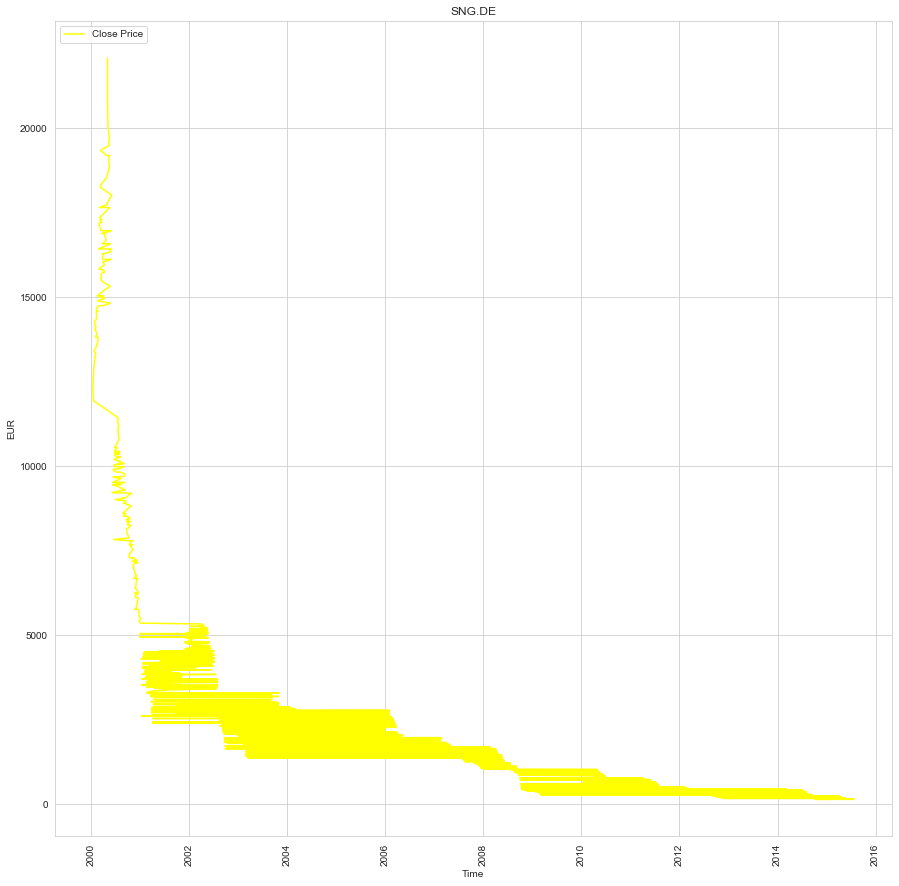

In [13]:
# Plotting close price for SNG.DE
fig = plt.figure(figsize=(15,15))
time = sng['date']
close = sng['closePrice']
plt.plot(time, close, c='yellow', label='Close Price')
plt.xticks(rotation=90)
plt.xlabel("Time")
plt.ylabel("EUR")
plt.title("SNG.DE")
plt.legend(loc='upper left')
plt.show()

We can notice that the close price in SNG.DE was high in 2000 and then plunged year by year. It explains why prices differ so much from the mean value. Let's see how the close price was changing in KSB3.DE.

In [14]:
# Grouping the results by company
ksb3 = stooq_de[stooq_de['companyTicker'] == 'KSB3.DE']
ksb3_info = ksb3.describe().round(2)
ksb3_info

,time,openPrice,high,low,closePrice,volume
count,2889.0,2889.00,2889.00,2889.00,2889.00,2889.00
mean,0.0,364.37,371.36,359.96,365.98,993.60
std,0.0,74.72,76.74,74.53,76.15,1180.64
min,0.0,182.01,186.31,175.32,175.80,2.00
25%,0.0,313.22,317.32,308.79,313.32,362.00
50%,0.0,372.03,381.21,365.07,374.52,689.00
75%,0.0,407.78,417.86,403.49,413.31,1214.00
max,0.0,572.43,584.06,570.56,578.21,18514.00


We can observe that in the case of KSB3.DE the close prices does not differ a lot from average (std is 76.15 USD while mean equals 365.98 USD). The minimum close price is 175.80 EUR and maximum 578.21 EUR. 

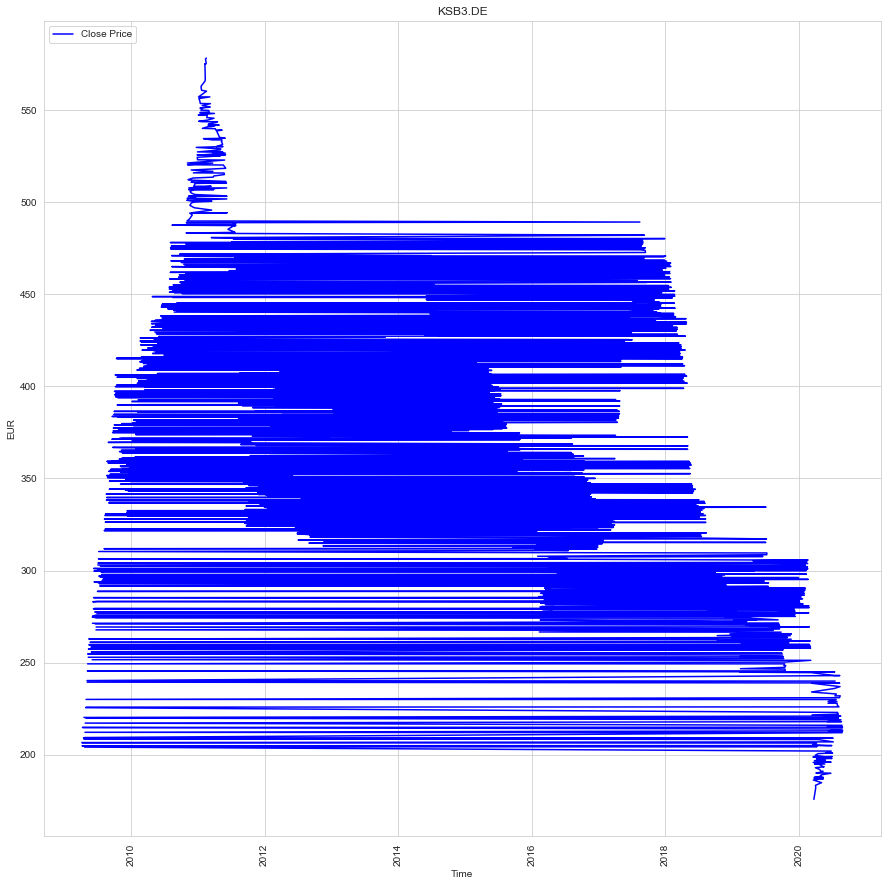

In [15]:
# Plotting close price for KSB3.DE
fig = plt.figure(figsize=(15,15))
time = ksb3['date']
close = ksb3['closePrice']
plt.plot(time, close, c='blue', label='Close Price')
plt.xticks(rotation=90)
plt.xlabel("Time")
plt.ylabel("EUR")
plt.title("KSB3.DE")
plt.legend(loc='upper left')
plt.show()

What we can say about KSB3.DE is the fact that the company's close price is quite unstable. Until 2018 the close price was between 200 and 480 EUR. We can observe that the close price decreases and is lower in 2020 in comparison to the past.

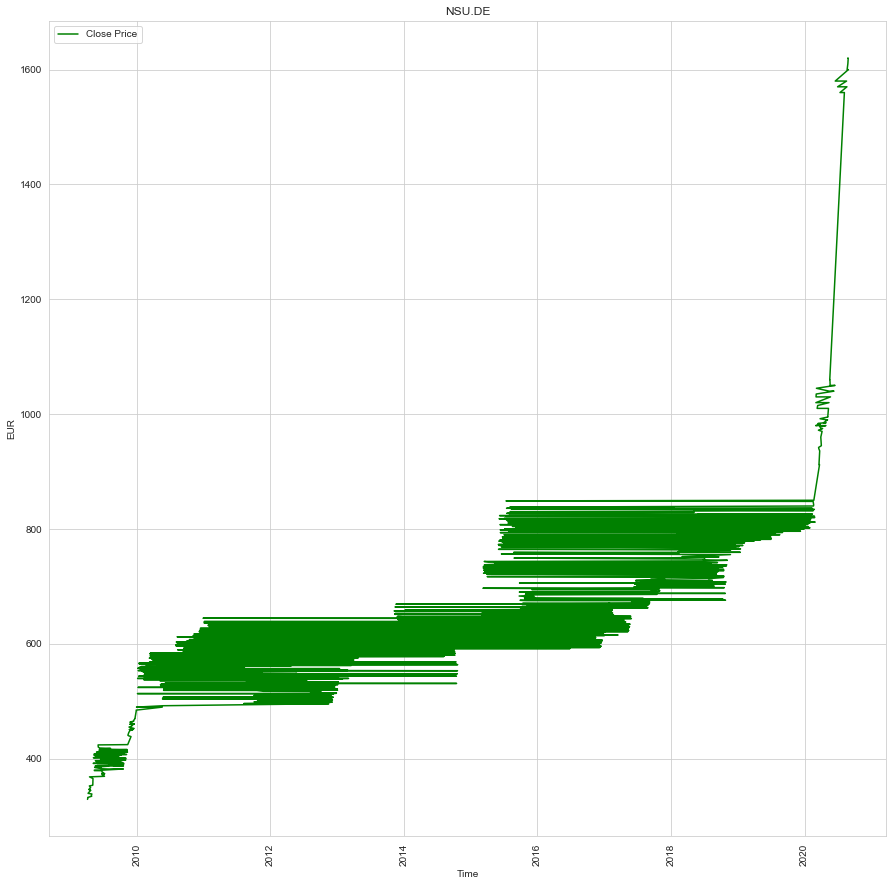

In [16]:
# Grouping the results by company
nsu = stooq_de[stooq_de['companyTicker'] == 'NSU.DE']
# Plotting close price for NSU.DE
fig = plt.figure(figsize=(15,15))
time = nsu['date']
close = nsu['closePrice']
plt.plot(time, close, c='green', label='Close Price')
plt.xticks(rotation=90)
plt.xlabel("Time")
plt.ylabel("EUR")
plt.title("NSU.DE")
plt.legend(loc='upper left')
plt.show()

In NSU.DE the close price keeps climbing. We can observe a steady growth in years 2010-2020 until the soar in 2020. By the way - NSU.DE is AUDI AG find out more [here](https://finance.yahoo.com/quote/NSU.DE/?guccounter=1&guce_referrer=aHR0cHM6Ly93d3cuZ29vZ2xlLnBsLw&guce_referrer_sig=AQAAABP5OYFmxdhszIXQUeS4IOKxfYZIRu5qiKWA3XtAKbE39ubon-8SUQ8H6NyWDNnxJHRI-AUaDOhDSBh47vj-8_AWNnwNY_KuSpjOSKRz0vlq1MU8raGEp4ihEo6xbGkGzYmQZayHLg5q5ASAoVpl0DdSEmiPbRUObAZUxn1HVVQz).

# Conclusion
---


The main idea of the project was to find interestng patterns and create visualizations in data coming from Stooq (stock exchange portal). 

We found out that the largest difference between maximum and mean close price was in SNG.DE. Interesting patterns were observed also for KSB3 and NSU.DE.